In [177]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
import sys
# sys.path.append("C:/Users/jordi/Documents/GitHub/policy-data-analyzer/tasks/")
sys.path.append("/home/propietari/Documents/GitHub/policy-data-analyzer/tasks/")
from data_loading.src.utils import *
from matplotlib import animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


In [130]:
def hist_bins(np_array):
    #compute the optimal number of bins for a histogram based on Freedman–Diaconis rule
    q25, q75 = np.percentile(np_array,[.25,.75])
    bin_width = 2*(q75 - q25)*len(np_array)**(-1/3)
    bins = round((np_array.max() - np_array.min())/bin_width)
    return bins

def build_chart_title(string):
    perc = string.split("_")[2].split("=")[1]
    epoch = string.split("_")[3]
    if epoch == "9":
        epoch = "10"
    if "36" in perc:
        perc = perc.replace("36", "25")
    if "stsb" in string:
        return "stsb/" + perc + "/" + epoch
    else:
        return "Paraphrase/" + perc + "/" + epoch
        

In [126]:
path = "../input"
files = list_files_from_dir(path)

final_dict = {}

for file in files:
    new_dict = load_json(path + "/" + file)
    for test_perc in new_dict:
        for iteration in new_dict[test_perc]:
            for model in new_dict[test_perc][iteration]:
                for epoch, value in new_dict[test_perc][iteration][model].items():
                    if epoch == "10":
                        epoch = "9"
                    test = test_perc.replace("25", "36")
                    key = model + "_" + test + "_" + epoch
                    final_list.append([key, value[0]["avg_f1"][1]])
                    if key in final_dict:
                        final_dict[key].append(round(value[0]["avg_f1"][1], 3))
                    else:
                        final_dict[key] = []
                        final_dict[key].append(round(value[0]["avg_f1"][1], 3))
                    

                    

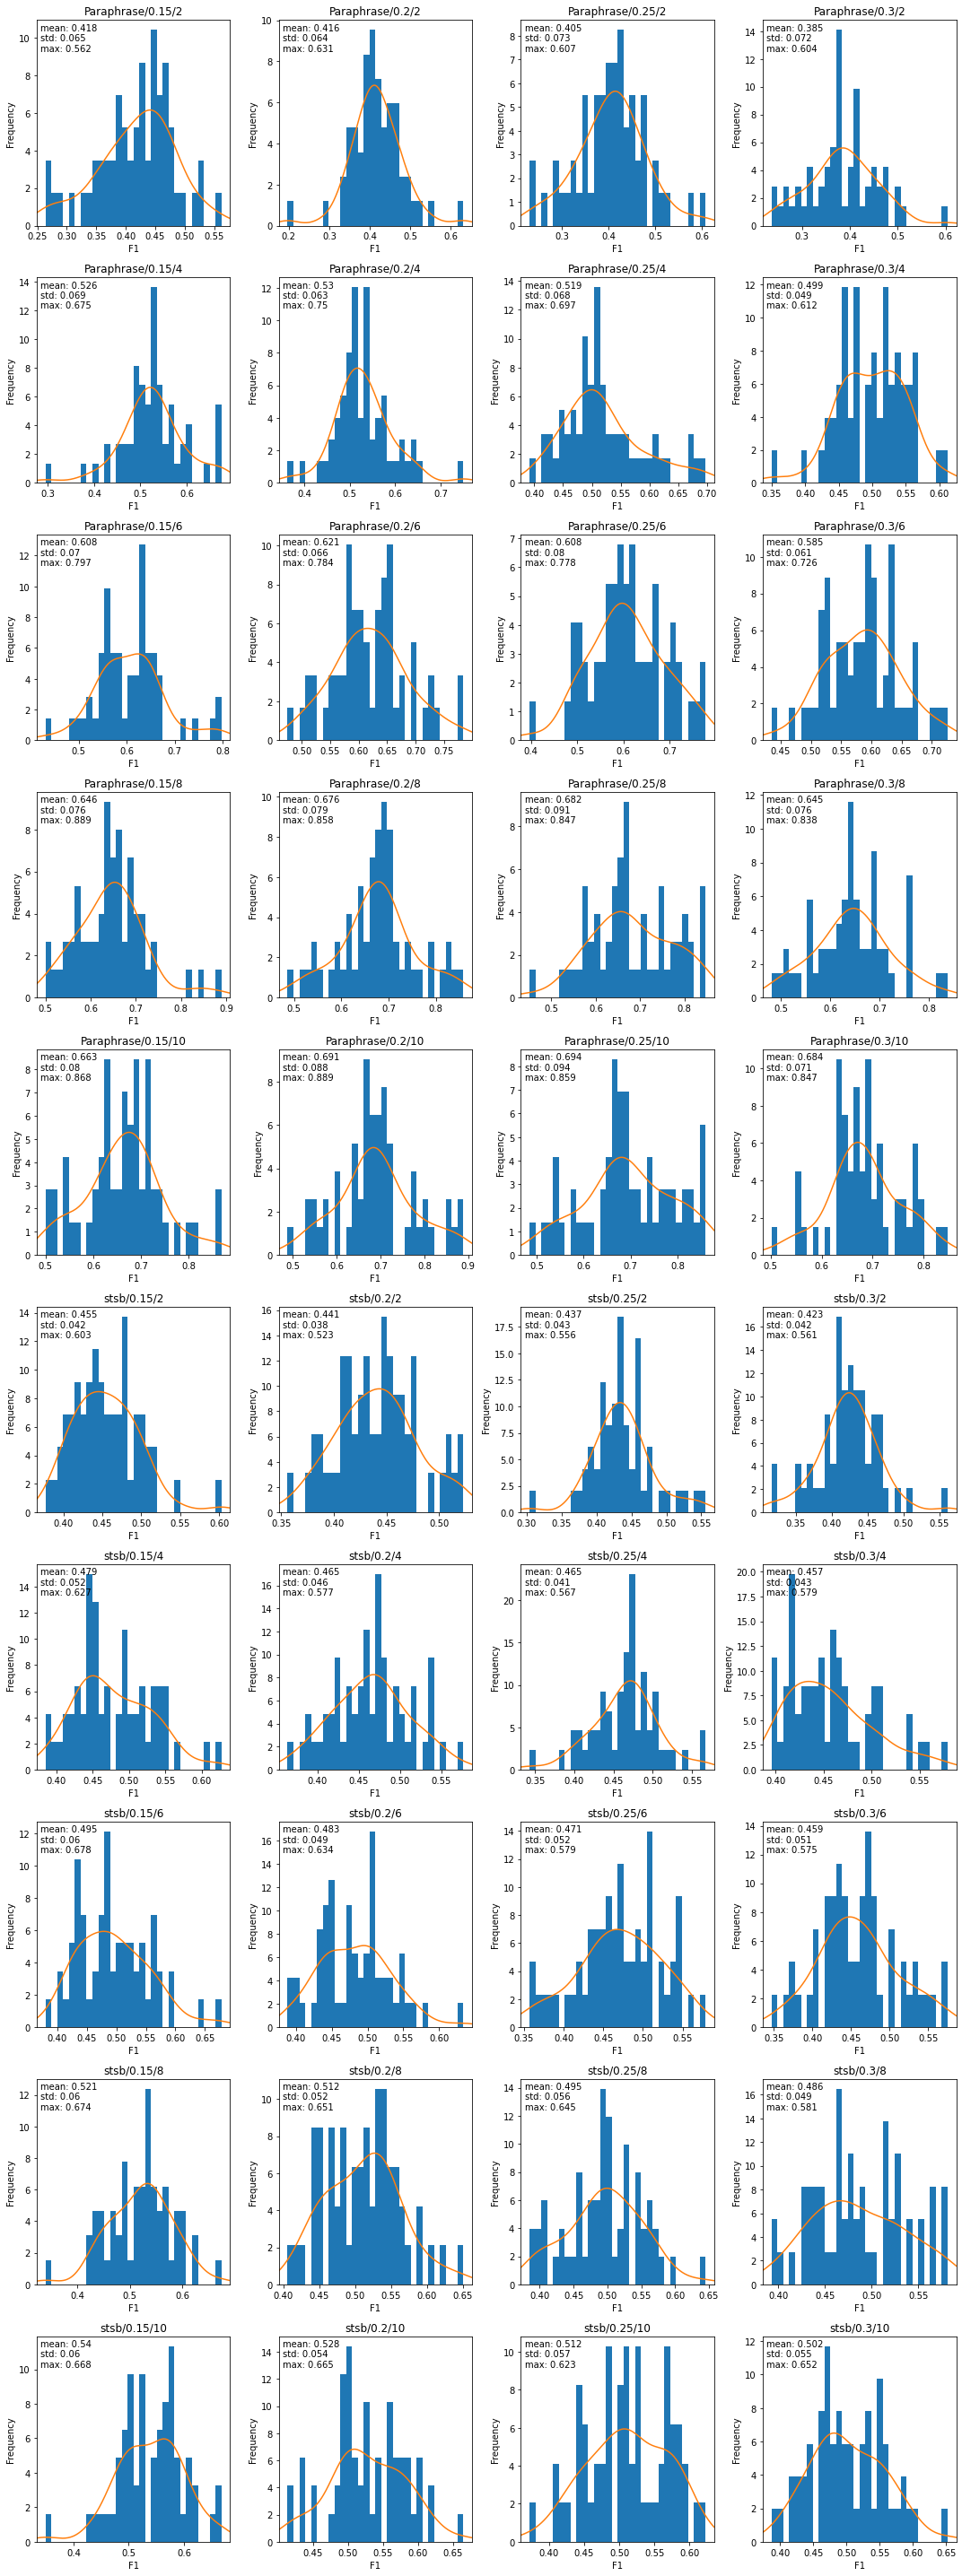

In [137]:
i = 0
k = 0
l = 0
j = 1 
n = 0
f = plt.figure(figsize=(15, 40))
stsb_list = []
paraphrase_list = []

for item, value in sorted(final_dict.items()):
    
    array = np.array(value)
    if i % 5 != 0:
        j = j + 4
    else:
        j = 1 + l + n
        l += 1
    i += 1
    if i % 20 == 0:
        k += 1
        n = 16
        i = 0
        j = 20 * k
        
#     print(np.max(array))
    plt.subplot(10, 4, j)
    plt.hist(array, density=True, bins=30)
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    kde = st.gaussian_kde(array)
    plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    plt.tight_layout()
#     plt.legend(loc="upper left")
    plt.annotate(f"mean: {round(np.mean(array), 3)}", xy=(0.02, 0.95), xycoords='axes fraction')
    plt.annotate(f"std: {round(np.std(array), 3)}", xy=(0.02, 0.90), xycoords='axes fraction')
    plt.annotate(f"max: {round(np.max(array), 3)}", xy=(0.02, 0.85), xycoords='axes fraction')
    plt.title(build_chart_title(item))
    plt.ylabel('Frequency')
    plt.xlabel('F1')
    
f.savefig("../output/stochasticity.pdf", bbox_inches='tight')
    


In [160]:
stsb_list = []
paraphrase_list = []

for item, value in sorted(final_dict.items()):
    array = np.array(value)
    if "stsb" in item:
        stsb_list.append([float(build_chart_title(item).split("/")[1]), int(build_chart_title(item).split("/")[2]), round(np.mean(array), 3), round(np.max(array), 3)])
    elif "paraphrase" in item:
        paraphrase_list.append([float(build_chart_title(item).split("/")[1]), int(build_chart_title(item).split("/")[2]), round(np.mean(array), 3), round(np.max(array), 3)])
        

In [161]:
paraphrase_list

[[0.15, 2, 0.418, 0.562],
 [0.15, 4, 0.526, 0.675],
 [0.15, 6, 0.608, 0.797],
 [0.15, 8, 0.646, 0.889],
 [0.15, 10, 0.663, 0.868],
 [0.2, 2, 0.416, 0.631],
 [0.2, 4, 0.53, 0.75],
 [0.2, 6, 0.621, 0.784],
 [0.2, 8, 0.676, 0.858],
 [0.2, 10, 0.691, 0.889],
 [0.25, 2, 0.405, 0.607],
 [0.25, 4, 0.519, 0.697],
 [0.25, 6, 0.608, 0.778],
 [0.25, 8, 0.682, 0.847],
 [0.25, 10, 0.694, 0.859],
 [0.3, 2, 0.385, 0.604],
 [0.3, 4, 0.499, 0.612],
 [0.3, 6, 0.585, 0.726],
 [0.3, 8, 0.645, 0.838],
 [0.3, 10, 0.684, 0.847]]

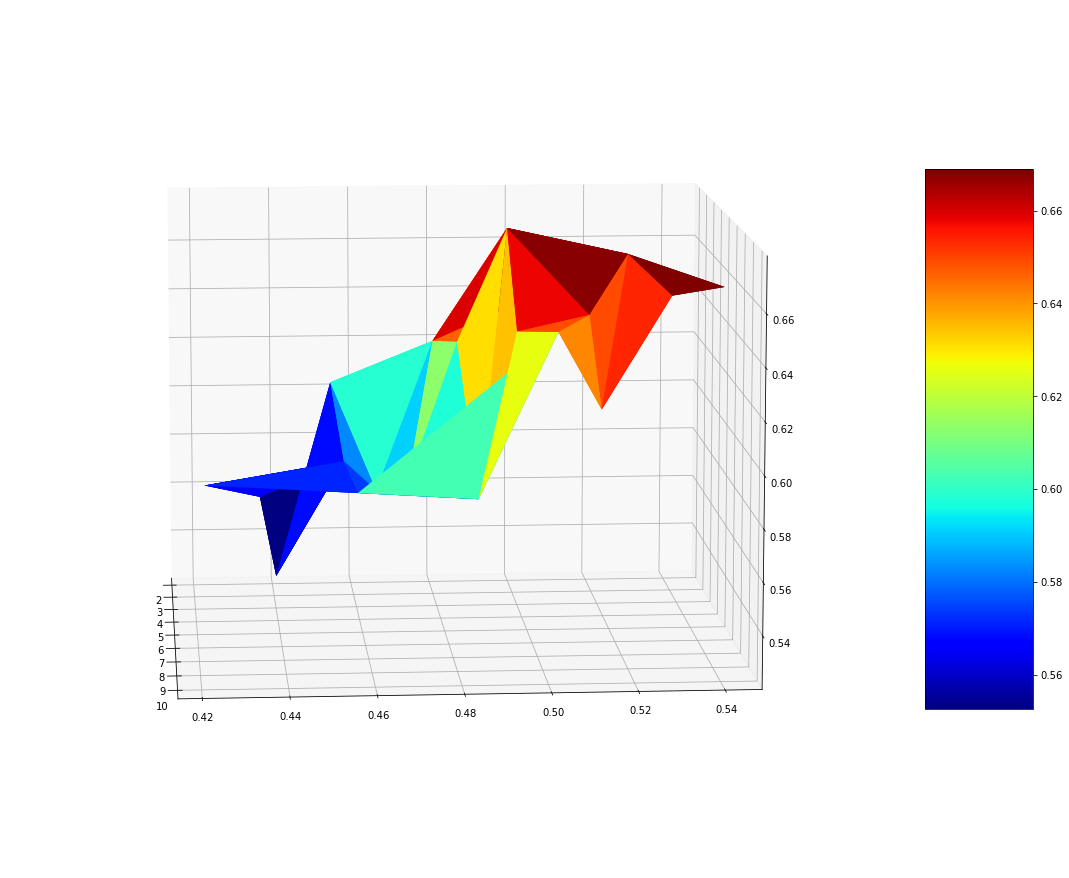

In [181]:

stsb = np.array(stsb_list)
X = stsb[:, 1]
Y = stsb[:, 2]
Z = stsb[:, 3]

fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

def init():
    # Plot the surface.
    ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
#     fig.colorbar(surf, shrink=0.5, aspect=5)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
ani.save('../output/stsb.mp4',writer='ffmpeg',fps=1000/100)


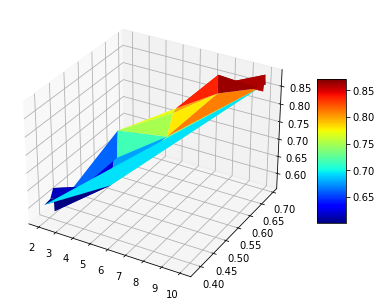

In [174]:

paraphrase = np.array(paraphrase_list)
X = paraphrase[:, 1]
Y = paraphrase[:, 2]
Z = paraphrase[:, 3]

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

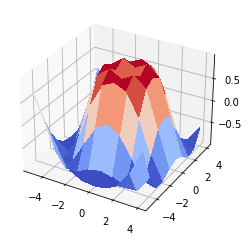

In [150]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 1)
Y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [151]:
Z

array([[ 0.70886129,  0.11965158, -0.43697552, -0.7820949 , -0.92618484,
        -0.95892427, -0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.11965158, -0.58617619, -0.95892427, -0.9712778 , -0.83133918,
        -0.7568025 , -0.83133918, -0.9712778 , -0.95892427, -0.58617619],
       [-0.43697552, -0.95892427, -0.89168225, -0.44749175, -0.02068353,
         0.14112001, -0.02068353, -0.44749175, -0.89168225, -0.95892427],
       [-0.7820949 , -0.9712778 , -0.44749175,  0.30807174,  0.78674913,
         0.90929743,  0.78674913,  0.30807174, -0.44749175, -0.9712778 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913, -0.02068353, -0.83133918],
       [-0.95892427, -0.7568025 ,  0.14112001,  0.90929743,  0.84147098,
         0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913